In [36]:
#Analise Exploratoria
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use("seaborn") > outra opção de style
plt.style.use("ggplot")

In [37]:
#Upload do arquivo #Temporario
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [38]:
#Criando DataFrame
base = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
#Visualizando as 5 primeiras linhas
base.head()

In [ ]:
#Analisando quantidade de linhas e colunas
base.shape

In [ ]:
#verificando os tipos de dados de cada coluna
base.dtypes

In [ ]:
#Qual a receita total ?
base["Valor Venda"].sum()

In [43]:
#Qual o custo total ? 
#Custo Total = Custo Unitario * Qtde
#utilizando .mul para multiplicação
base["Custo Total"] = base["Custo Unitário"].mul(base["Quantidade"])

In [ ]:
base.sample(5)

In [ ]:
#Qual o custo total ? 
#round ,2 arredondando para o resultado sendo 2 casas decimais
round(base["Custo Total"].sum(), 2)

In [46]:
#Criando coluna de lucro
#Lucro = Receita total - Custo Total
base["Lucro"] = base["Valor Venda"] - base["Custo Total"]

In [ ]:
base.sample(1)

In [ ]:
#total de lucro
round(base["Lucro"].sum(),2)

In [49]:
#Criando uma coluna com total de dias para enviar o produto
base["Tempo Envio"] = base["Data Envio"] - base["Data Venda"]

In [ ]:
base.sample(1)

In [ ]:
#verificando os tipos de dados de cada coluna
base.dtypes

In [52]:
#Media do tempo de envio para cada Marca 
#Transformando a coluna Tempo Envio de: Data Para: Numero
#.dt.days extrair apenas os dias, retirar a palavra days

base["Tempo Envio"] = (base["Data Envio"]- base["Data Venda"]).dt.days

In [ ]:
#Agrupar por marca e calcular a media do tempo de envio
#.mean serve para calcular a media
round(base.groupby("Marca")["Tempo Envio"].mean(),4)

In [ ]:
#Verificando se temos valores vazios na base
#Todas as colunas estão preenchias ?
base.isnull().sum()

In [ ]:
#Lucro por ano e por marca

In [ ]:
base.sample(1)

In [ ]:
#lucro por ano

In [ ]:
#round(base.groupby("Data Venda").base.year, ["Lucro"].mean(),4)
#round(base.groupby([base["Data Venda"].dt.year, "Marca"])["Lucro"].sum(),2)
#base.groupby([base["Data Venda"].dt.year, "Marca"])["Lucro"].sum()
base.groupby([base["Data Venda"].dt.year])["Lucro"].sum()

In [ ]:
#Transformando em tabela
ano_lucro = base.groupby([base["Data Venda"].dt.year])["Lucro"].sum().reset_index()
ano_lucro

In [ ]:
#Lucro por ano e por marca
base.groupby([base["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

In [99]:
#configuração pandas para mostrar sem notação cientifica
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
#Somando Lucro por marca
base.groupby([base["Marca"]])["Lucro"].sum()

In [ ]:
#Novamente 
#Lucro por ano e por marca
base.groupby([base["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

In [77]:
#Trazer em formato colunar #Lucro por ano e por marca
#basta utilizar .reset_index()
lucro_ano = base.groupby([base["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

In [ ]:
lucro_ano

In [ ]:
base.sample(1)

In [ ]:
#Qual o total de produtos vendidos ?
round(base["Quantidade"].sum(),2)

In [ ]:
#Qual o total de produtos vendidos por produto
#ascending=False é do maior para o menor
base.groupby([base["Produto"]])["Quantidade"].sum().sort_values(ascending=False)

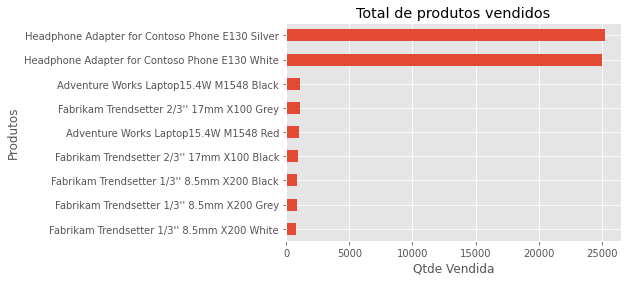

In [96]:
#Gerando grafico de pizza para o total de produtos vendidos por produto
base.groupby([base["Produto"]])["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de produtos vendidos")
plt.xlabel("Qtde Vendida")
plt.ylabel("Produtos");

In [175]:
base.groupby([base["Produto"]])["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

In [ ]:
#Grafico de Lucro por ano
base.groupby([base["Data Venda"].dt.year])["Lucro"].sum().sort_values(ascending=True).plot.barh(title="Total de vendas por ano")
plt.xlabel("Lucro")
plt.ylabel("Ano")
plt.legend();

In [ ]:
#Grafico de Lucro por ano barra vertical
base.groupby([base["Data Venda"].dt.year])["Lucro"].sum().sort_values(ascending=True).plot.bar(title="Total de vendas por ano")
plt.xlabel("Ano")
plt.ylabel("Lucro");

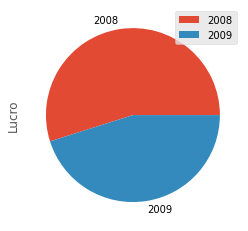

In [179]:
#Grafico de Lucro por ano
base.groupby(geral["Data Venda"].dt.year)["Lucro"].sum().plot.pie()
plt.legend();

In [176]:
#Somando lucropor ano
base.groupby([base["Data Venda"].dt.year])["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [109]:
#Analisando apenas o ano de 2009
base_2009 = base[base["Data Venda"].dt.year == 2009]  

In [ ]:
#Lucro por mes do ano 2009
base_2009.groupby([base_2009["Data Venda"].dt.month])["Lucro"].sum().sort_values(ascending=False)

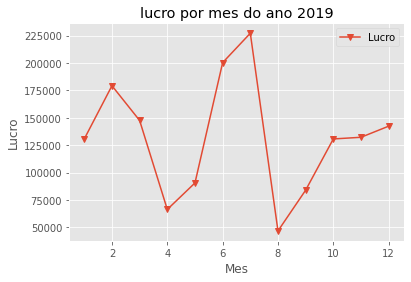

In [171]:
#Grafico do Lucro por mes do ano 2009
base_2009.groupby([base_2009["Data Venda"].dt.month])["Lucro"].sum().plot(title="lucro por mes do ano 2019", marker="v")
plt.xlabel("Mes")
plt.ylabel("Lucro")
plt.legend();

In [ ]:
base_2009.groupby([base_2009["Data Venda"].dt.month])["Lucro"].sum()

In [ ]:
base_2009.head()

In [144]:
#Lucro por marca do ano de 2009
base_2009.groupby([base["Marca"]])["Lucro"].sum().sort_values(ascending=False)

Marca
Fabrikam                  1,034,091.35
Adventure Works             405,395.08
Contoso                     138,258.95
Name: Lucro, dtype: float64

In [ ]:
round(base_2009["Lucro"].sum(),1)

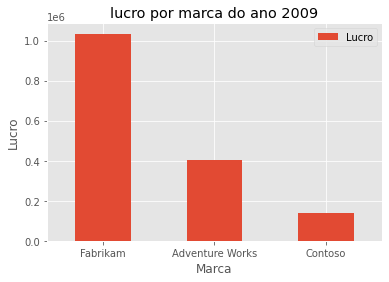

In [147]:
#Grafico do lucro por marca do ano de 2009 
base_2009.groupby([base["Marca"]])["Lucro"].sum().sort_values(ascending=False).plot.bar(title="lucro por marca do ano 2009")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.legend()
plt.xticks(rotation='horizontal');

In [ ]:
#Verificar o Lucro por classe
base_2009.groupby([base["Classe"]])["Lucro"].sum().sort_values(ascending=False).plot.bar(title="lucro por classe do ano 2009")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.legend()
plt.xticks(rotation='horizontal');

In [155]:
#trazendo todos os valores da coluna Classe removendo duplicadas
base_2009["Classe"].unique()

array(['Regular', 'Economy'], dtype=object)

In [ ]:
#Lucro por classe
base_2009.groupby([base["Classe"]])["Lucro"].sum().sort_values(ascending=False)

In [161]:
#Analise estatisticas do tempo de envio
base["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

In [ ]:
base.sample(5)

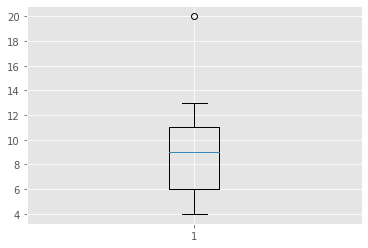

In [180]:
#Grafico de boxplot
#max                    20.00 outlier, dados discrepantes
#75%                    11.00
#50%                     9.00 media
#25%                     6.00
#min                     4.00
plt.boxplot(base["Tempo Envio"]);


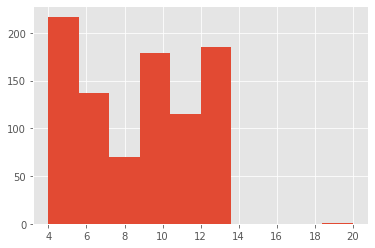

In [165]:
#Histograma do tempo de envio
plt.hist(base["Tempo Envio"]);

In [ ]:
#Tempo minimo de envio
base["Tempo Envio"].min()

In [ ]:
#Tempo maximo de envio
base["Tempo Envio"].max()

In [169]:
#Trazendo este valor outlier, tempo envio = 20
base[base["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
#para baixar um arquivo com analise realizada
#index=false para não trazer o numero de index
# base.to_csv("nome_do_arquivo.csv", index=False)